## 1) Построить интервальный статистический ряд и гистограмму частот

In [106]:
import numpy as np

# Исходная выборка
sample = [
    14.4, 30.3, 16.3, 34, 34.3, 25.7, 31.1, 36.2,
    36.8, 18.3, 25, 19.9, 32.9, 26.1, 21.7,
    19, 31.6, 20.4, 24.4, 38, 11.4, 21.4, 24.2,
    25.8, 30.9, 28.7, 26.4, 32.6, 24.6, 21.1,
    32.9, 35.6, 33.4, 35.3, 25.2, 26.3, 32.5,
    17.4, 24.7, 18.9, 28.9, 23.7, 32.5, 24.3,
    26.2, 46, 11.3, 41.6, 24.8, 29.4, 25.1, 49.1
]
sample = np.array(sample)
sample


array([14.4, 30.3, 16.3, 34. , 34.3, 25.7, 31.1, 36.2, 36.8, 18.3, 25. ,
       19.9, 32.9, 26.1, 21.7, 19. , 31.6, 20.4, 24.4, 38. , 11.4, 21.4,
       24.2, 25.8, 30.9, 28.7, 26.4, 32.6, 24.6, 21.1, 32.9, 35.6, 33.4,
       35.3, 25.2, 26.3, 32.5, 17.4, 24.7, 18.9, 28.9, 23.7, 32.5, 24.3,
       26.2, 46. , 11.3, 41.6, 24.8, 29.4, 25.1, 49.1])

In [107]:
# Вариационный ряд
sample.sort()
sample

array([11.3, 11.4, 14.4, 16.3, 17.4, 18.3, 18.9, 19. , 19.9, 20.4, 21.1,
       21.4, 21.7, 23.7, 24.2, 24.3, 24.4, 24.6, 24.7, 24.8, 25. , 25.1,
       25.2, 25.7, 25.8, 26.1, 26.2, 26.3, 26.4, 28.7, 28.9, 29.4, 30.3,
       30.9, 31.1, 31.6, 32.5, 32.5, 32.6, 32.9, 32.9, 33.4, 34. , 34.3,
       35.3, 35.6, 36.2, 36.8, 38. , 41.6, 46. , 49.1])

In [108]:
# Объём выборки
n = len(sample)
n

52

In [109]:
# Максимальное и минимальное значения соответственно
print(sample.max())
print(sample.min())

49.1
11.3


In [110]:
# Размах выборки
R = sample.max() - sample.min()
R

37.8

In [111]:
# Число интервалов
m = np.floor(1 + 3.322 * np.log10(n))
m

6.0

In [112]:
# Длина частичного интервала
h = np.ceil(R / m)
h

7.0

In [113]:
# Начало первого интервала
x0 = np.round(sample.min() - h / 2, 4)
x0

7.8

In [114]:
from IPython.display import IFrame

# Построим гистограмму
def print_gtable(url, width=550, height=700):
    return IFrame(src=url, width=width, height=height)


print_gtable("https://docs.google.com/spreadsheets/d/e/2PACX-1vQZlOowB8zfaCAsNEeV1r_7nW-zjth-KsOu69YqhCXKVlKVTATQ41Gj9osIPammsdbY6C7iiPuWusoc/pubhtml?widget=true&amp;headers=false")

## 2 Найти точечные и интервальные оценки

### Точечные оценки

In [115]:
# Выборочное среднее
x_with_line = sample.sum() / len(sample)
x_with_line

27.47307692307692

In [116]:
# Выборочная дисперсия
s_2 = np.sum((sample - x_with_line) ** 2) / len(sample)
s_2

61.35119822485206

In [117]:
# Исправленная выборочная дисперсия
s_2_with_line = len(sample) / (len(sample) - 1) * s_2
s_2_with_line

62.55416289592759

In [118]:
# Соответственно выборочная среднеквадратичное отклонение и
# исправленное выборочное среднеквадратичное отклонение
s = np.sqrt(s_2)
s_with_line = np.sqrt(s_2_with_line)
s, s_with_line

(7.832700570355799, 7.9091189709048875)

### Интервальные оценки

Предположим,  что  выборка  состоит из наблюдений, которые является  независимыми  одинаково распределенными  нормальными  случайными  величинами.
Построить  95%  доверительный  интервал  для  математического ожидания.

Т.е. найдём доверительный интервал значимости 0.05 для параметра a нормального распределения N(a, σ) при неизвестном σ

[Таблица значений](http://mathprofi.ru/files/u/student_n.png)

Имеем $t_{n-1, 1-α} = t_{51, 0.95} \approx 2$

In [119]:
from scipy import stats

t = stats.t(df=51).ppf(0.975)
t

2.007583768155882

In [120]:
# Доверительный  интервал для α
e = (np.sqrt(s_2_with_line)) / (np.sqrt(len(sample))) * t
I_a = [x_with_line - e, x_with_line + e]
I_a

[25.271164142851784, 29.674989703302057]

Доверительный  интервал  значимости  α = 0.05  для  дисперсии   θ2  =  σ   в  модели  N(θ1,  θ2)  =  N(a,  σ)  при  неизвестном  a.

[Таблица значений](http://mathprofi.ru/files/u/xi2.jpg)

Имеем $\alpha_1 = \frac{1-\gamma}{2} = \frac{1-0.95}{2} = 0.025, \alpha_2 = \frac{1+\gamma}{2} = \frac{1+0.95}{2} = 0.975$

Тогда $\chi^2_{\alpha_1, k} = \chi^2_{\alpha_1, n - 1} = \chi^2_{0.025, 51} \approx 72.6$

И $\chi^2_{\alpha_2, k} = \chi^2_{\alpha_2, n - 1} = \chi^2_{0.975, 51} \approx 33.2$

In [121]:
chi2 = stats.chi2(df=51).ppf(1 - 0.025), stats.chi2(df=51).ppf(1 - 0.975)
chi2

(72.61599226908585, 33.161786369126936)

In [122]:
# Доверительный интервал для σ
I_sigma = [np.sqrt(((n - 1) * s_2) / (chi2[0])), np.sqrt(((n + 1) * s_2) / (chi2[1]))]
I_sigma

[6.564179893614085, 9.90217279926559]

## 3 Провести выравнивание ряда

(array([0.01526252, 0.02747253, 0.05494505, 0.04578755, 0.00915751,
        0.00610501]),
 array([11.3, 17.6, 23.9, 30.2, 36.5, 42.8, 49.1]),
 <BarContainer object of 6 artists>)

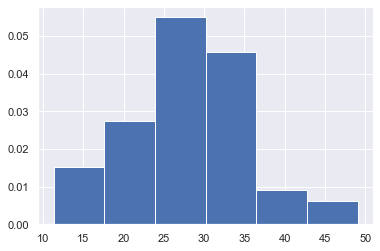

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Гистограмма
sns.set()
plt.hist(sample, density=True, bins=6)

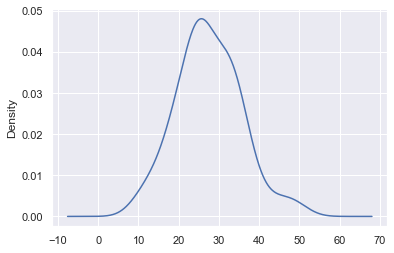

In [124]:
import pandas as pd

# Ядерное сглаживание
pd.Series(sample).plot.kde();

Исходя из вида гистограммы и ядерного сглаживания выполним выравнивание ряда
нормальным распределением $N(\overline x; S)$.

In [125]:
# Определим функцию для отображения графика плотности непрерывного распределения
def show_pdf(pdf, xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения

    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    sns.set()
    grid = np.linspace(xmin, xmax, grid_size)
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()

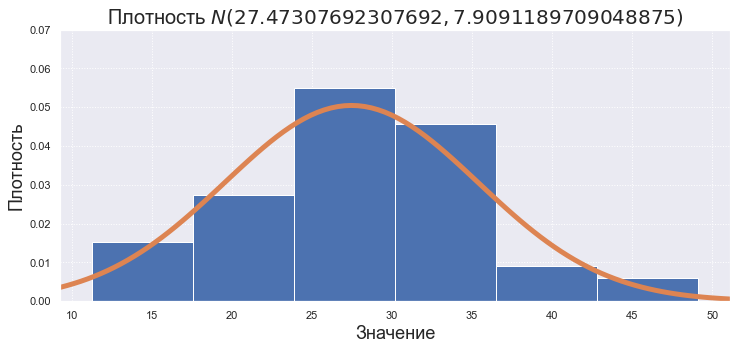

In [126]:
# Гистограмма с нормальным распределением
plt.figure(figsize=(12, 5))
sns.set()
plt.hist(sample, density=True, bins=6)
show_pdf(
    pdf=stats.norm.pdf, xmin=sample.min() - 2, xmax=sample.max() + 2, ymax=0.07,
    grid_size=100, distr_name=r'$N({loc}, {scale})$', loc=x_with_line, scale=s_with_line
)

## 4 Найти числовые характеристики выборки ($m_o, m_e, A, E$)

Чтобы найти моду, нужно найти __модальный интервал__ (_с максимальной частотой_)

Данный интервал $(21.8; 28.8)$.

Используем формулу:

$M_0 = x_0 + \frac{n_M - n_{M-1}}{(n_M - n_{M-1}) + (n_M - n_{M+1})} \cdot h$, где:

- $x_0 = 21.8$ – нижняя граница модального интервала;
- $h = 28.8 - 21.8 = 7$ – длина модального интервала;
- $n_M = 17$ – частота модального интервала;
- $n_{M-1} = 10$ – частота предыдущего интервала;
- $n_{M+1} = 16$ – частота следующего интервала.

In [127]:
m_o = 21.8 + (17 - 10) / ((17 - 10) + (17 - 16)) * 7
m_o

27.925

__Медианный интервал__ – это интервал, содержащий варианту (либо 2 варианты), которая делит вариационный ряд на две равные части.

Медианный интервал совпадает с модальным интервалом – $(21.8; 28.8)$.

Медиана:

$m_e = x_0 + \frac{0.5 \cdot n - n^н_{m-1}}{n_m} \cdot h$, где:

- $n = 52$ – объём статистической совокупности;
- $x_0 = 21.8$ – нижняя граница медианного интервала;
- $h = 7$ – длина медианного интервала;
- $n_m = 17$ – _частота_ медианного интервала;
- $n^н_{m-1} = 13$ – _накопленная частота_ __предыдущего__ интервала.

In [128]:
m_e = 21.8 + (0.5 * 52 - 13) / 17 * 7
m_e

27.152941176470588

In [129]:
# Медиана, найденная при помощи numpy
np.median(sample)

26.15

Коэфф. асимметрии эмпирического распределения рассчитывается по формуле:

$A = \frac{m_3}{s^3}$, где:

- $m_3 = \frac{\sum_{i=1}^n (x_i - \overline x)^3}{n}$ – центральный эмпирический момент третьего порядка;
- $s^3$ – куб стандартного выборочного отклонения.

In [130]:
A = (np.sum((sample - x_with_line) ** 3) / n) / s_with_line ** 3
A

0.3062551738647082

In [131]:
# Коэфф. асимметрии, посчитанный с помощью scipy
stats.skew(sample)

0.3153066901703748

Коэфф. эксцесса эмпирического распределения рассчитывается по формуле:

$E = \frac{m_4}{s^4} - 3$, где:

- $m_4 = \frac{\sum_{i=1}^n (x_i - \overline x)^4}{n}$ – центральный эмпирический момент четвёртого порядка;
- $s^4$ – стандартное выборочное отклонение в четвёртой степени.

In [132]:
E = (np.sum((sample - x_with_line) ** 4) / n) / s_with_line ** 4 - 3
E

0.13740742541612017

In [133]:
# Эксцесс, посчитанный с помощью scipy
stats.kurtosis(sample)

0.26164924195508954

## 5 По виду гистограммы и числовым характеристикам выдвинуть гипотезу о з.р. С.В. X, оценить параметры теор. закона и записать его вид.

In [134]:
# У нормального распределения математическое ожидание совпадает с модой и медианой.
# В нашем случае соответствующие выборочные показатели весьма близки друг к другу
x_with_line, m_o, m_e

(27.47307692307692, 27.925, 27.152941176470588)

In [135]:
# Выполнение правила «трёх» сигм. Практически все значения нормальной случайной величины находятся в интервале 3 сигм
[x_with_line - 3 * s_with_line, x_with_line + 3 * s_with_line]
# В этот интервал попадают все значения

[3.745720010362259, 51.200433835791586]

In [136]:
# Коэффициенты асимметрии и эксцесса нормального распределения равны нулю.
# В нашем случае эти характеристики не сказать что сильно, но довольно таки близки к нулю
A, E

(0.3062551738647082, 0.13740742541612017)

Найдём теоретические частоты по формуле:

$n^`_i = \frac{h \cdot n}{S} \cdot f(z_i)$, где
$f(z) = \frac{1}{\sqrt(2\pi)} \cdot e^{-\frac{z^2}{2}}$ и
$z_i = \frac{x_i - \overline x}{S}$

In [137]:
print_gtable("https://docs.google.com/spreadsheets/d/e/2PACX-1vSAJU-m03cXfN7NmYcOSyiSfD215AY8gVRitL3-oB_otSw4bM2bDkMCkcysXGcoND9tul5TdY9InY9q/pubhtml?gid=0&single=true", width=600, height=900)

## 6 Проверить основную гипотезу по критерию Пирсона

На уровне значимости 0.05 проверим гипотезу $H_0$ о том, генеральная совокупность распределена нормально.
Конкурирующая гипотеза $H_1$ состоит в том, что распределение генеральной совокупность не является нормальным.

In [138]:
print_gtable("https://docs.google.com/spreadsheets/d/e/2PACX-1vR132YpoJ6aDIQiaTzuVcjr3fhq_JFNV4U4PWYcv6N_ZXNLi3OWE9WqS_euWTMF_EZfCetGaqplyHYi/pubhtml?gid=0&single=true", width=550, height=420)

$\chi_{\text{набл.}}^2 = 0.29$ оказалось меньше, чем $\chi_{\text{кр.}}^2 = 3.84$, следовательно
на уровне значимости 0.05 гипотезу $H_0$ о нормальном распределении принимаем.
